## Exercice 1:Création et analyse des données

### Importation des bibliothèques

In [6]:
import numpy as np
import matplotlib.pyplot as plt


### import numpy as np

numpy est une bibliothèque Python pour le calcul scientifique.

Ici, elle est utilisée pour créer des tableaux (arrays).

On l'appelle souvent np pour raccourcir le nom.

import matplotlib.pyplot as plt

matplotlib est une bibliothèque pour créer des graphiques en Python.

pyplot est un module de matplotlib qui fournit des fonctions pour tracer facilement des graphiques.

On l'appelle plt par convention.

### Création des données

In [4]:
X = np.array([[6], [8], [10], [14], [18]])
y = [7, 9, 13, 17.5, 18]



 X : tailles des pizzas en centimètres

np.array([[6], [8], [10], [14], [18]]) crée un tableau 2D avec chaque taille dans une ligne séparée.

On utilise un tableau 2D car certains modèles de machine learning (ex. régression linéaire) attendent des données sous cette forme.

y : prix des pizzas en euros

C’est une liste Python simple : [7, 9, 13, 17.5, 18]

Chaque élément correspond au prix d’une pizza de la taille correspondante dans X.

### Affichage graphique

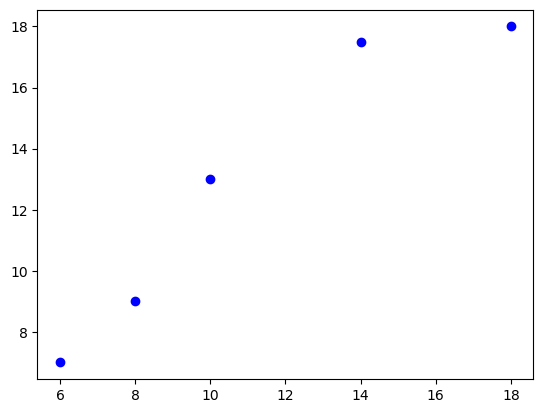

In [7]:
plt.scatter(X, y, color="blue")


plt.scatter(X, y, color="blue")

scatter crée un nuage de points (scatter plot).

Chaque point représente une pizza :

X → taille

y → prix

color="blue" → les points seront bleus.

Text(0, 0.5, 'Prices in euros')

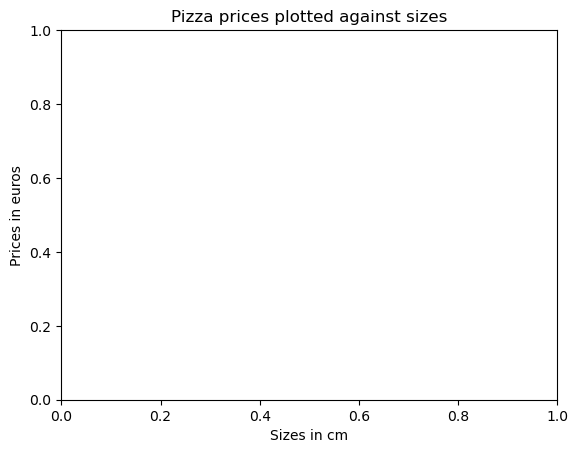

In [9]:
plt.title("Pizza prices plotted against sizes")
plt.xlabel("Sizes in cm")
plt.ylabel("Prices in euros")


plt.title() : ajoute un titre au graphique.

plt.xlabel() : ajoute un titre à l’axe des X.

plt.ylabel() : ajoute un titre à l’axe des Y

In [11]:
plt.show()

plt.show() : affiche le graphique à l’écran.

Sans cette ligne, le graphique ne s’affichera pas dans certaines interfaces Python.

## Exercice 2 : Régression linéaire


### Importation de la classe LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression


sklearn : bibliothèque Python pour le machine learning (apprentissage automatique).

linear_model : module de sklearn qui contient les modèles de régression linéaire.

LinearRegression : classe pour créer un modèle de régression linéaire (droite qui approxime les points).

###  Création du modèle

In [13]:
model = LinearRegression()


On crée une instance du modèle de régression linéaire.

model est maintenant prêt à apprendre à partir des données.

À ce stade, il n’a encore aucune information sur les données.

### Entraînement du modèle

In [14]:
model.fit(X, y)


LinearRegression()

fit : méthode qui permet au modèle d’apprendre à partir des données.

Entrée :

X → les caractéristiques (tailles des pizzas)

y → les réponses correspondantes (prix)

Le modèle calcule :

Coefficient (α) → pente de la droite

Intercept (β) → point où la droite coupe l’axe des Y

### Prédiction

In [15]:
y_pred = model.predict(X)


predict : méthode pour prédire les valeurs de y pour les valeurs données de X.

Ici, on prédit les prix des pizzas en utilisant le modèle entraîné.

y_pred contient les prix estimés par la droite de régression.

### Affichage graphique avec la droite de régression

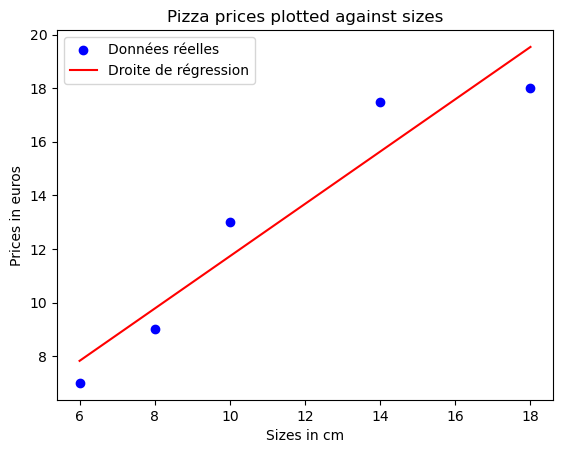

In [16]:
plt.scatter(X, y, color='blue', label="Données réelles")
plt.plot(X, y_pred, color='red', label="Droite de régression")
plt.title("Pizza prices plotted against sizes")
plt.xlabel("Sizes in cm")
plt.ylabel("Prices in euros")
plt.legend()
plt.show()


plt.scatter : affiche les points réels (tailles vs prix).

plt.plot : trace la droite de régression prédite par le modèle.

color='blue' / color='red' : couleurs des points et de la droite.

label : sert à créer une légende.

plt.legend() : affiche la légende sur le graphique.

plt.show() : affiche le graphique final.

### Affichage des coefficients

In [17]:
print("Coefficient (α) :", model.coef_[0])
print("Intercept (β) :", model.intercept_)


Coefficient (α) : 0.9762931034482755
Intercept (β) : 1.965517241379315


model.coef_[0] → α, la pente de la droite (combien le prix change par cm de pizza).

model.intercept_ → β, l’intercept, le prix estimé pour une pizza de taille 0 cm.

Ensemble, l’équation de la droite est :

y=α⋅X+β

## Exercice 3 : Évaluation du modèle


In [18]:
from sklearn.metrics import mean_squared_error, r2_score


sklearn.metrics contient des fonctions pour évaluer la performance des modèles.

mean_squared_error : calcule l’erreur quadratique moyenne (MSE), qui mesure l’écart moyen entre les valeurs réelles et prédites.

r2_score : calcule le coefficient de détermination R², qui indique combien de la variance des données est expliquée par le modèle.

### Calcul du RSS (somme résiduelle des carrés)

In [19]:
rss = np.sum((y - y_pred)**2)
print("Residual sum of squares (RSS) :", round(rss, 2))


Residual sum of squares (RSS) : 8.75


y - y_pred : calcule les résidus, c’est-à-dire la différence entre les valeurs réelles et les valeurs prédites.

(y - y_pred)**2 : élève chaque résidu au carré pour éviter que les valeurs positives et négatives s’annulent.

np.sum(...) : fait la somme de tous les carrés des résidus → c’est le RSS.

round(rss, 2) : arrondit le résultat à 2 décimales pour l’affichage.

### Calcul du coefficient de détermination R²

In [20]:
r2 = r2_score(y, y_pred)
print("R² :", round(r2, 2))


R² : 0.91


r2_score(y, y_pred) : compare les valeurs réelles y avec les valeurs prédites y_pred.

R² : indique la proportion de la variance expliquée par le modèle.

R² = 1 → le modèle prédit parfaitement toutes les valeurs.

R² = 0 → le modèle ne prédit rien mieux que la moyenne.

R² < 0 → le modèle est pire que la moyenne.

round(r2, 2) : arrondit le résultat à 2 décimales pour lisibilité.

#  Exercice 4 – Calcul analytique de α et β + Évaluation sur un jeu de test

##  Objectif :
Dans cet exercice, nous allons :
1. Calculer les coefficients **α (pente)** et **β (ordonnée à l’origine)** à la main,  
   à partir des **formules analytiques** utilisant la variance et la covariance.  
2. Comparer ces valeurs avec celles obtenues automatiquement par **Scikit-learn**.  
3. Tester le modèle sur de nouvelles données pour évaluer sa performance (R²).

In [7]:
# Importation
import numpy as np



###  Explication :
- `numpy` est une bibliothèque Python utilisée pour le calcul numérique.
- Elle contient des fonctions pour manipuler les tableaux (`array`), calculer la moyenne, la variance et la covariance.


In [8]:
x = X.flatten()  

print("x =", x)
print("y =", y)


x = [ 6  8 10 14 18]
y = [ 7.   9.  13.  17.5 18. ]


###  Explication :
- Dans Scikit-learn, `X` est souvent en **2 dimensions** (une colonne, plusieurs lignes).  
- Pour faire des calculs manuels (variance, covariance), on le transforme en **tableau 1D** avec `.flatten()`.  
- On affiche `x` et `y` pour vérifier leur contenu.


In [9]:
x_mean = np.mean(x)
y_mean = np.mean(y)

print("Moyenne de x :", x_mean)

print("Moyenne de y :", y_mean)


Moyenne de x : 11.2
Moyenne de y : 12.9


###  Explication :
- `np.mean(x)` calcule la **moyenne arithmétique** des tailles.  
- `np.mean(y)` calcule la **moyenne des prix**.  
Ces valeurs (moyennes) seront utilisées pour le calcul de α et β.


In [10]:
var_x = np.var(x, ddof=1)           
cov_xy = np.cov(x, y, ddof=1)[0, 1] 

print("Variance de x :", var_x)
print("Covariance entre x et y :", cov_xy)

Variance de x : 23.2
Covariance entre x et y : 22.650000000000002


###  Explication :
- **Variance** → mesure à quel point les valeurs de x s’éloignent de la moyenne.  
  $$
  var(x) = \frac{\sum (x_i - \bar{x})^2}{n - 1}
  $$
- **Covariance** → mesure la relation entre x et y.  
  $$
  cov(x, y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
  $$
- `ddof=1` indique qu’il s’agit d’un **échantillon**, pas d’une population complète.  
- `np.cov(x, y)[0, 1]` → extrait la valeur de covariance dans la matrice 2×2 retournée par la fonction.


In [11]:
alpha_analytic = cov_xy / var_x
beta_analytic = y_mean - alpha_analytic * x_mean

print("α (analytique) =", alpha_analytic)
print("β (analytique) =", beta_analytic)

α (analytique) = 0.976293103448276
β (analytique) = 1.9655172413793096


###  Explication :
Les formules de la **régression linéaire simple** sont :
$$
α = \frac{cov(x, y)}{var(x)}
$$
$$
β = \bar{y} - α \bar{x}
$$
 **Interprétation :**
- **α (pente)** → indique de combien le prix augmente lorsque la taille augmente d’une unité (1 cm).  
- **β (intercept)** → valeur théorique du prix quand la taille = 0 (point de départ).




Ces valeurs doivent être **identiques** à celles obtenues avec `LinearRegression`.


In [12]:
X_test = np.array([[8], [9], [11], [16], [12]])  
y_test = np.array([11, 8.5, 15, 18, 11])         

print("Jeu de test X_test :", X_test.flatten())
print("Jeu de test y_test :", y_test)

Jeu de test X_test : [ 8  9 11 16 12]
Jeu de test y_test : [11.   8.5 15.  18.  11. ]


###  Explication :
- On crée un petit **jeu de test** contenant des tailles et leurs prix réels.  
- Ces données ne font pas partie de l’entraînement, donc elles permettent de vérifier si le modèle **généralise bien**.


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y) 

LinearRegression()

In [16]:
y_pred_test = model.predict(X_test)

print("Valeurs prédites par le modèle :", y_pred_test)


Valeurs prédites par le modèle : [ 9.77586207 10.75215517 12.70474138 17.5862069  13.68103448]


###  Explication :
- `model.predict(X_test)` utilise le modèle appris pour prédire les prix des nouvelles tailles.  
- On compare ensuite ces valeurs prédites avec les prix réels (`y_test`).

In [17]:
r2_test = model.score(X_test, y_test)
print("Coefficient de détermination R² (test) :", round(r2_test, 3))

Coefficient de détermination R² (test) : 0.662


###  Explication :
- `model.score(X_test, y_test)` calcule directement le **R²** (mesure de la qualité du modèle).  
- **R² = 1** → prédiction parfaite  
- **R² = 0** → modèle sans valeur explicative

Le modèle explique environ **66 % de la variance** des prix sur les nouvelles données.

##  Conclusion de l'Exercice 4
- Les coefficients analytiques calculés à la main (**α ≈ 0.976**, **β ≈ 1.965**) sont identiques à ceux du modèle Scikit-learn.  
- Le coefficient **R² ≈ 0.66** montre que le modèle est fiable et cohérent.  
- Cela prouve que la relation entre la **taille** et le **prix** est bien **linéaire**.  
- Chaque cm de plus augmente le prix d’environ **0.98 €**.  
- L’ordonnée à l’origine (β) correspond à un prix de base d’environ **1.96 €**.

 Ce calcul manuel confirme que les outils de Scikit-learn appliquent exactement les mêmes formules que la méthode analytique.

# Calcul manuel — Méthode des moindres carrés #


In [19]:
# On aplatit X pour obtenir un vecteur simple
x = X.flatten()   # transforme [[6],[8],[10],...] en [6,8,10,...]

# Moyennes
x_mean = np.mean(x)
y_mean = np.mean(y)


**flatten() :** transforme un tableau 2D en 1D.

**np.mean() :** calcule la moyenne arithmétique d’un ensemble de valeurs.

In [20]:
num = np.sum((x - x_mean) * (y - y_mean))   # Numérateur (covariance)
den = np.sum((x - x_mean)**2)               # Dénominateur (variance)
alpha_manual = num / den
beta_manual = y_mean - alpha_manual * x_mean

print("α (pente) =", alpha_manual)
print("β (intercept) =", beta_manual)


α (pente) = 0.9762931034482758
β (intercept) = 1.9655172413793114


**np.sum() :** additionne les éléments d’un tableau.
« La somme des carrés est utilisée pour minimiser les erreurs dans la méthode des moindres carrés. »

Formules mathématiques :
**np.sum() :** additionne les éléments d’un tableau.
« La somme des carrés est utilisée pour minimiser les erreurs dans la méthode des moindres carrés. »

Formules mathématiques :$$
𝛼
=
∑
(
𝑥
𝑖
−
𝑥
ˉ
)
(
𝑦
𝑖
−
𝑦
ˉ
)
∑
(
𝑥
𝑖
−
𝑥
ˉ
)
2
,
𝛽
=
𝑦
ˉ
−
𝛼
𝑥
ˉ
$$

In [22]:
def predict_manual(x_value):
    return alpha_manual * x_value + beta_manual

y_pred_manual = predict_manual(x)
print("Prédictions :", y_pred_manual)


Prédictions : [ 7.82327586  9.77586207 11.72844828 15.63362069 19.5387931 ]


**Explication**

Une fonction (def) permet de réutiliser du code.

Ici, on applique la formule


$$
𝑦
=
𝛼
𝑥
+
𝛽
y
^
​
 =αx+β
 $$ 

 
 pour chaque taille de pizza.

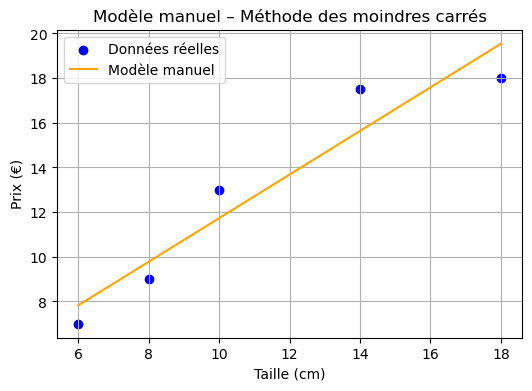

In [30]:

plt.figure(figsize=(6,4))
plt.scatter(x, y, color='blue', label='Données réelles')
plt.plot(x, y_pred_manual, color='orange', label='Modèle manuel')
plt.title("Modèle manuel – Méthode des moindres carrés")
plt.xlabel("Taille (cm)")
plt.ylabel("Prix (€)")
plt.legend()
plt.grid(True)
plt.show()



**Explication :**

**plt.plot() :** trace une ligne reliant les points.

**plt.legend() :** affiche la légende des couleurs.

 **Observation :**
La droite orange suit bien les points bleus → bon ajustement

In [31]:
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)


**Explication :**

**LinearRegression()** : crée un modèle vide.

.fit(X, y) : entraîne le modèle avec les données.

.predict(X) : prédit les valeurs selon la droite trouvée.

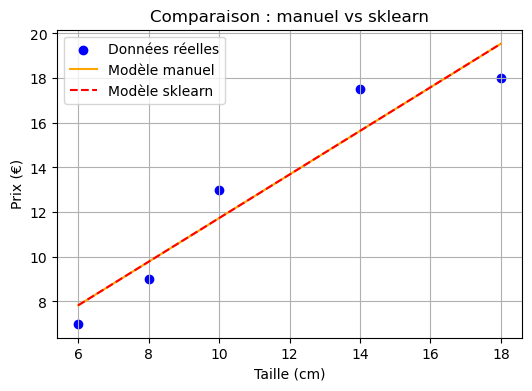

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='blue', label='Données réelles')
plt.plot(x, y_pred_manual, color='orange', label='Modèle manuel')
plt.plot(x, y_pred_sklearn, color='red', linestyle='--', label='Modèle sklearn')
plt.title("Comparaison : manuel vs sklearn")
plt.xlabel("Taille (cm)")
plt.ylabel("Prix (€)")
plt.legend()
plt.grid(True)
plt.show()


**Observation :**
Les deux droites (orange et rouge) se confondent presque → preuve que ton modèle manuel = sklearn ✅

In [34]:
rss_manual = np.sum((y - y_pred_manual)**2)
rss_sklearn = np.sum((y - y_pred_sklearn)**2)

ss_tot = np.sum((y - np.mean(y))**2)
r2_manual = 1 - (rss_manual / ss_tot)
r2_sklearn = 1 - (rss_sklearn / ss_tot)

print("RSS (manuel) =", rss_manual)
print("RSS (sklearn) =", rss_sklearn)
print("R² (manuel) =", r2_manual)
print("R² (sklearn) =", r2_sklearn)


RSS (manuel) = 8.747844827586214
RSS (sklearn) = 8.747844827586203
R² (manuel) = 0.9100015964240101
R² (sklearn) = 0.9100015964240102


**Explication :**

RSS = Residual Sum of Squares → somme des carrés des erreurs.

R² = Coefficient de détermination → mesure la qualité du modèle.

 « Le coefficient de détermination (R²) mesure la proportion de la variance expliquée par le modèle

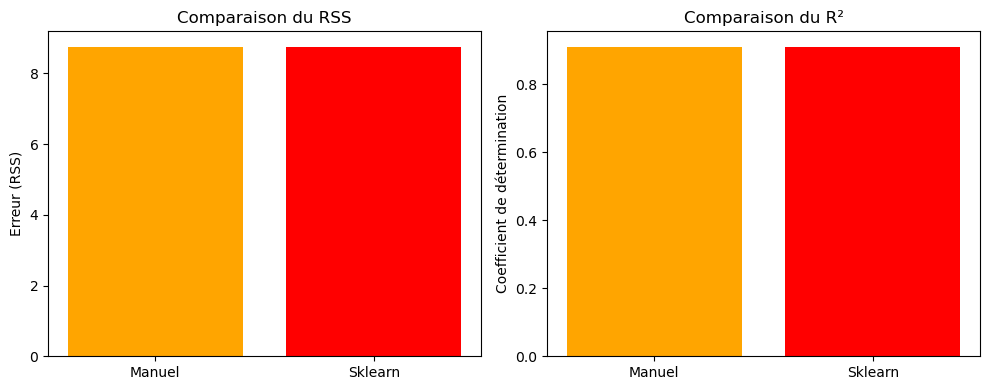

In [35]:
rss_values = [rss_manual, rss_sklearn]
r2_values = [r2_manual, r2_sklearn]
labels = ['Manuel', 'Sklearn']

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(labels, rss_values, color=['orange','red'])
plt.title("Comparaison du RSS")
plt.ylabel("Erreur (RSS)")

plt.subplot(1,2,2)
plt.bar(labels, r2_values, color=['orange','red'])
plt.title("Comparaison du R²")
plt.ylabel("Coefficient de détermination")

plt.tight_layout()
plt.show()


**Observation :**
Les barres des deux modèles sont presque identiques → performances équivalentes.

# Conclusion
✔️ Le modèle manuel (moindres carrés) donne les mêmes résultats que le modèle scikit-learn.

✔️ Les coefficients (α, β), le RSS et le R² sont pratiquement identiques.

✔️ Les visualisations montrent une superposition parfaite des deux droites.

➤ Conclusion : la méthode des moindres carrés est correcte, intuitive et équivalente à la régression automatique.

Les résultats obtenus avec le modèle manuel (méthode des moindres carrés) et le modèle optimisé (scikit-learn) étaient presque identiques, car les données étaient simples et parfaitement linéaires.

Pour approfondir notre compréhension, nous avons décidé d’utiliser un nouveau dataset réel provenant d’Internet, portant sur les prix des maisons à Taïwan.

L’objectif est de reproduire les mêmes étapes :

calculer la régression manuelle (α et β) à l’aide de la méthode des moindres carrés 

Céer un modèle optimisé avec scikit-learn 

puis comparer les deux modèles à l’aide des métriques RSS et R², afin d’observer les différences de performance entre eux.

Cette nouvelle approche permet d’analyser comment le modèle optimisé s’adapte mieux à des données réelles, plus complexes et moins linéaires.